In [2]:
# Importing required packages


import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV




import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalit.gaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading Data

In [3]:
pd.set_option('max_colwidth', None)

In [4]:
train = pd.read_csv(r"D:\Task\Analytics_Vidhya\Twitter_Sentiment_Analysis\train_E6oV3lV.csv")
test = pd.read_csv(r"D:\Task\Analytics_Vidhya\Twitter_Sentiment_Analysis\test_tweets_anuFYb8.csv")

## EDA - Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# Checking for NULL/missing values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [10]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)


In [8]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [11]:
train['tweet_length'] = train['tweet'].apply(len)
train['tweet'] = train['tweet'].map(lambda x: re.sub('\\n',' ',str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'\W',' ',str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'\s+',' ',str(x)))
train['tweet'] = train['tweet'].str.lower()

train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\’", "\'", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"dont", "do not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'re", " are", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'s", " is", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\’d", " would", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\d", " would", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'t", " not", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'m", " am", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\n", "", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\r", "", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\'", "", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r"\"", "", str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
train['tweet'] = train['tweet'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
train['tweet'] = train['tweet'].apply(lambda x: remove_stopwords(x))
train.head(10)

,id,label,tweet,tweet_length
0,1,0,user father dysfunctional is selfish drags kids his dysfunction run,95
1,2,0,user user thanks lyft credit use cause don offer wheelchair vans pdx disapointed getthanked,108
2,3,0,bihday majesty,20
3,4,0,model love take all time urð ð ð ð ð ð ð ð,56
4,5,0,factsguide society motivation,34
5,6,0,would would huge fan fare big talking they leave chaos pay disputes they get allshowandnogo,121
6,7,0,user camping tomorrow user user user user user user user dannyâ,65
7,8,0,next school year the year exams ð think that ð school exams hate imagine actorslife revolutionschool girl,126
8,9,0,won love land allin cavs champions cleveland clevelandcavaliers â,73
9,10,0,user user welcome it gr would,41


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [13]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"
17196,49159,"my song ""so glad"" free download! #shoegaze #newmusic #newsong"


In [14]:
test['tweet'] = test['tweet'].map(lambda x: re.sub('\\n',' ',str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'\W',' ',str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'\s+',' ',str(x)))
test['tweet'] = test['tweet'].str.lower()

test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\’", "\'", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"dont", "do not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'re", " are", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'s", " is", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\’d", " would", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\d", " would", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'t", " not", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'m", " am", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\n", "", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\r", "", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\'", "", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r"\"", "", str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
test['tweet'] = test['tweet'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
test['tweet'] = test['tweet'].apply(lambda x: remove_stopwords(x))

test.tail(10)

,id,tweet
17187,49150,loving lifeð ºð â ï ð createyourfuture lifestyle holiday la hyatt regency long beach
17188,49151,black professor demonizes proposes nazi style confiscation white assets like would would would would germany breaking
17189,49152,learn to think positive positive instagram instagood
17190,49153,love pretty happy fresh teenilicious fixdermateen generationz pretty fresh
17191,49154,would_damn_tuff ruff_muff__techno_city ng would would would web would would would would ukhx_int web hardcore wouldgabba vk
17192,49155,thought factory left right polarisation trump uselections would would would would leadership politics brexit blm gt would
17193,49156,feeling like mermaid ð hairflip neverready formal wedding gown dresses mermaid â
17194,49157,hillary campaigned today ohio omg amp used words like assets amp liability never did clinton say thee word radicalization
17195,49158,happy work conference right mindset leads culture development organizations work mindset
17196,49159,song glad free download shoegaze newmusic newsong



# **0-positive, 1-negative**

<AxesSubplot:xlabel='label', ylabel='count'>

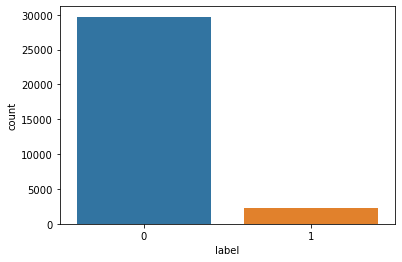

In [15]:
sns.countplot(train["label"])

In [16]:
train2 = train.drop('label', axis=1)
target = train["label"]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [17]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2019)

## Vectorize

In [18]:
import string

def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [19]:
# Convert all the text into vector form

#vec = CountVectorizer(analyzer=process_text)
#vec = CountVectorizer()
#vec = CountVectorizer(stop_words='english', binary=True)
#vec = CountVectorizer(stop_words='english', ngram_range=(1,10), analyzer='char', token_pattern=r'\w{1,}', min_df=4)
#vec = CountVectorizer(stop_words='english', ngram_range=(1,4), analyzer='char', min_df=4)
#vec = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 4), stop_words = 'english')

#vec = TfidfVectorizer(stop_words='english')
#vec = TfidfVectorizer(stop_words='english', sublinear_tf=True, strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1, 3), max_features=20000)
#vec = TfidfVectorizer(ngram_range=(1,5), min_df=3, stop_words='english', max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1, sublinear_tf=1 )
vec = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

#vec = HashingVectorizer()

#X_train_counts = vec.fit_transform(x_train['tweet'])
X_train_counts = vec.fit_transform(train['tweet'])

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(31962, 23049)

In [20]:
X_val_counts = vec.transform(x_val['tweet'])
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
print(X_val_tfidf.shape)

(9589, 23049)


In [21]:
X_test_counts = vec.transform(test['tweet'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(17197, 23049)



## Different Machine Learning Models

In [0]:
#KNN
# from sklearn.neighbors import KNeighborsClassifier
# clf_knn = KNeighborsClassifier(n_neighbors=26,random_state=2019).fit(X_train_tfidf, target)
# y_pred = clf_knn.predict(X_test_tfidf)
# y_pred

In [0]:
# param_grid = dict(n_neighbors=list(range(1, 31)),weights=['uniform', 'distance'])
# print(param_grid)
# grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X_train_tfidf, target)
# print(grid.best_estimator_)
# print(grid.best_params_)
# print(grid.best_score_)

In [0]:
#accuracy_score(y_val, clf_knn.predict(X_val_tfidf))
# from sklearn.metrics import f1_score
# f1_score(y_true, y_pred, average='macro') 


In [0]:
#Random Forest
# from sklearn.ensemble import RandomForestClassifier
# clf_forest = RandomForestClassifier(random_state=2019,n_estimators=100).fit(X_train_tfidf, target)
# #clf_forest = RandomForestClassifier(n_estimators=200, random_state=2019, min_samples_split=2, min_samples_leaf=2, criterion="entropy", bootstrap=False).fit(X_train_tfidf, target)
# y_pred = clf_forest.predict(X_test_tfidf)
# y_pred

In [0]:
#Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# clf_nb = MultinomialNB(alpha=1,random_state=2019).fit(X_train_tfidf, target)
# y_pred = clf_nb.predict(X_test_tfidf)
# y_pred

In [0]:
#Ridge Classifier
# from sklearn.linear_model import RidgeClassifier
# clf_rdg = RidgeClassifier(alpha=1000, random_state=2019).fit(X_train_tfidf, target)
# #clf_rdg = RidgeClassifier(tol=1e+2, solver="sag").fit(X_train_tfidf, target)
# y_pred = clf_rdg.predict(X_test_tfidf)
# y_pred

In [0]:
#Gradient Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# #clf_gbc = GradientBoostingClassifier(random_state=2019).fit(X_train_tfidf, target)
# clf_gbc = GradientBoostingClassifier(n_estimators=300,max_depth=5,random_state=2019).fit(X_train_tfidf, target)
# y_pred = clf_gbc.predict(X_test_tfidf)
# y_pred

In [0]:
#Ada Boost
# from sklearn.ensemble import AdaBoostClassifier
# clf_abc = AdaBoostClassifier(random_state=2019).fit(X_train_tfidf, target)
# y_pred = clf_abc.predict(X_test_tfidf)
# y_pred

In [0]:
#XG Boost Classifier
# from xgboost import XGBClassifier
# clf_xgb = XGBClassifier(random_state=2019, params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':200, 'subsample':0.6, 'objective':'binary:logistic'}).fit(X_train_tfidf, target)
# y_pred = clf_xgb.predict(X_test_tfidf)
# y_pred


## Predict on test data

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=2019, C=1000).fit(X_train_tfidf, target)
#clf_log = LogisticRegression(random_state=2019, C=100).fit(X_train_tfidf, y_train)
#clf_log = LogisticRegression(random_state=2019, solver='lbfgs',C=10).fit(X_train_tfidf, y_train)
y_pred = clf_log.predict(X_test_tfidf)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
clf_log

LogisticRegression(C=1000, random_state=2019)

In [21]:
for c in [10, 50, 100, 1000, 10000]:
    lr = LogisticRegression(C=c, random_state=2019).fit(X_train_tfidf, target)
    #lr = LogisticRegression(C=c, random_state=2019).fit(X_train_tfidf, y_train)
    print ("f1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(X_val_tfidf))))

#Accuracy for C=50: 0.9627717816361645
#f1 score for C=1000: 0.999298245614035

f1 score for C=10: 0.9283582089552238
f1 score for C=50: 0.9957805907172996
f1 score for C=100: 0.9978917779339423
f1 score for C=1000: 0.9985955056179775
f1 score for C=10000: 0.9985955056179775


In [22]:
#print(f1_score(y_val, clf_log.predict(X_val_tfidf), average='micro'))
print(f1_score(y_val, clf_log.predict(X_val_tfidf), average='macro'))
#print(f1_score(y_val, clf_log.predict(X_val_tfidf), average='weighted'))

0.999241427473853


## Submission

In [23]:
submission = {}
submission['id'] = test['id']
submission['label'] = y_pred
submission = pd.DataFrame(submission)
submission = submission[['id', 'label']]
submission.to_csv("submisision.csv", index=False)
print(submission['label'].value_counts())

0    16088
1     1109
Name: label, dtype: int64
